In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy import stats as ss

In [58]:
test = pd.read_csv('/Users/aditya/Google Drive (as11919@nyu.edu)/Syncing with Mac/Babel Analysis/gevme_selected_exports/merchandises.csv')

In [59]:
def cramers(x,y):
    """
    Function to calculate Cramers Correlation
    
    Input: column_1, column_2
    Output: correlation r (float)
    """
        confusion_matrix = pd.crosstab(x,y)
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
        
        return corr

In [60]:
def correlation(x, y, method='pearson'): #option for type of correlation added 
    
    """
    Function to calculate correlation in given method
    
    Input: column_1, column_2, method = ['pearson','spearman','kendall','cramers']
    Output: correlation r (float)
    """
    try:
        if (method == 'pearson'): 
            corr, _ = ss.pearsonr(x,y)
        elif (method == 'spearman'): 
            corr, _ = ss.spearmanr(x,y)
        elif (method == 'kendall'): 
            corr, _ = ss.kendalltau(x,y)
        elif (method == 'cramers'): 
            corr = cramers(x,y)
    except:
        corr = cramers(x,y)
        
    return corr

In [67]:
def make_corr_dict(df, method='pearson'):
    
    """
    Function to make dictionaries of all column combinations and correlations
    
    Input: dataframe, method = ['pearson','spearman','kendall','cramers']
    Output: (correlation dictionary : singles, correlation dictionary : mirrored), Prints (Unused columns number and names)
    """
    
    variables = dict(df.dtypes)
    for_corr = df[list(col for col in df.columns if (len(set(df[col]))!=len(df[col])) & df[col].notna().any())].copy()
    for_corr.fillna(0, inplace = True)
    col_combinations = list(itertools.combinations(for_corr.columns,2))
    corr_dict = dict(((x,y),correlation(for_corr[x],for_corr[y], method)) for x,y in col_combinations)
    mirrors = dict(((b,a),(c)) for ((a,b),(c)) in corr_dict.items())
    corr_dict_mirror = corr_dict.copy()
    corr_dict_mirror.update(mirrors)
    
    print("Used Columns : ", len(for_corr.columns))
    print("Unused Columns : ", len(df.columns)-len(for_corr.columns), "\nUnused Col Names: ", np.setdiff1d(df.columns,for_corr.columns))
    
    return(corr_dict, corr_dict_mirror)

In [62]:
def corr_table(corr_dict_mirror):
    
    """
    Function to visualize all correlations
    
    Input: mirrored dictionary of correlations
    Output: Prints (heatmap)
    """
    
    corr_table = pd.DataFrame(corr_dict_mirror, index=[0]).T.reset_index(level=[0,1]).pivot(index='level_0', columns='level_1')
    corr_table.columns = corr_table.columns.droplevel(0)

    plt.figure(figsize=(10,10))
    sns.heatmap(corr_table)

In [63]:
def significance(corr_dict, min_value, max_value):   
    
    """
    Function to print all significant correlations between columns
    
    Input: Dictionary of Correlations: Singles, minimum value of correlational significance, maximum value of correlational significance
    Output: List of all significant column combinations
    """
    
    large_corr = pd.DataFrame(range(0,len(corr_dict)),corr_dict).reset_index(level=[0,1])
    large_corr = large_corr[(large_corr[0]>max_value)| (large_corr[0]<min_value)]
    print(large_corr.to_string(), "\n\n")

In [75]:
corr_dict, corr_dict_mirror = make_corr_dict(test, 'cramers')

Used Columns :  17
Unused Columns :  1 
Unused Col Names:  ['id']


In [76]:
significance(corr_dict)

          level_0       level_1    0
1        event_id      formtype    1
2        event_id     fieldname    2
3        event_id     fieldtype    3
4        event_id   field_index    4
5        event_id         label    5
6        event_id     choice_id    6
7        event_id  choice_index    7
8        event_id  choice_value    8
9        event_id         price    9
10       event_id           qty   10
11       event_id        status   11
12       event_id       created   12
13       event_id    created_by   13
14       event_id      modified   14
15       event_id   modified_by   15
16           type      formtype   16
17           type     fieldname   17
18           type     fieldtype   18
19           type   field_index   19
20           type         label   20
21           type     choice_id   21
22           type  choice_index   22
23           type  choice_value   23
24           type         price   24
25           type           qty   25
26           type        status   26
2

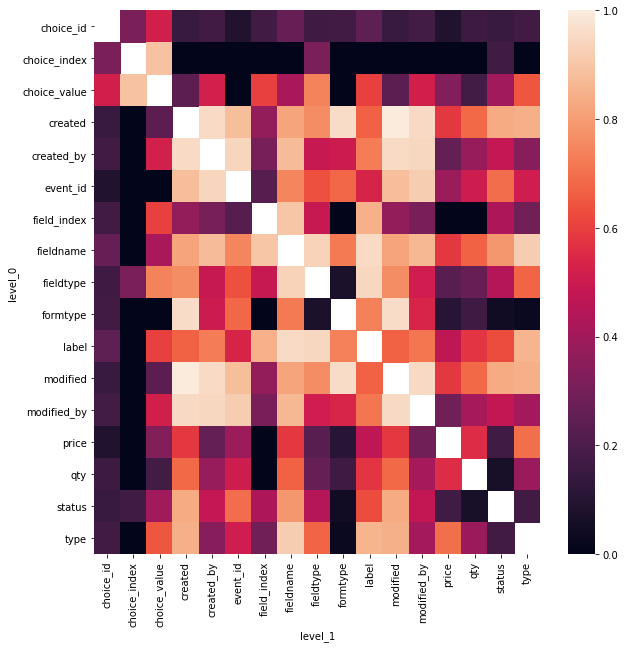

In [77]:
corr_table(corr_dict_mirror)